In [35]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.feature_selection import SelectKBest
from sklearn.datasets import load_boston
from sklearn.model_selection import learning_curve

# UNDERSTANDING DATA

In [2]:
boston=load_boston()


In [3]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [4]:
df=pd.DataFrame(data=boston.data,columns=boston.feature_names)

In [5]:
df['price']=boston.target

In [6]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# VISUALIZATION

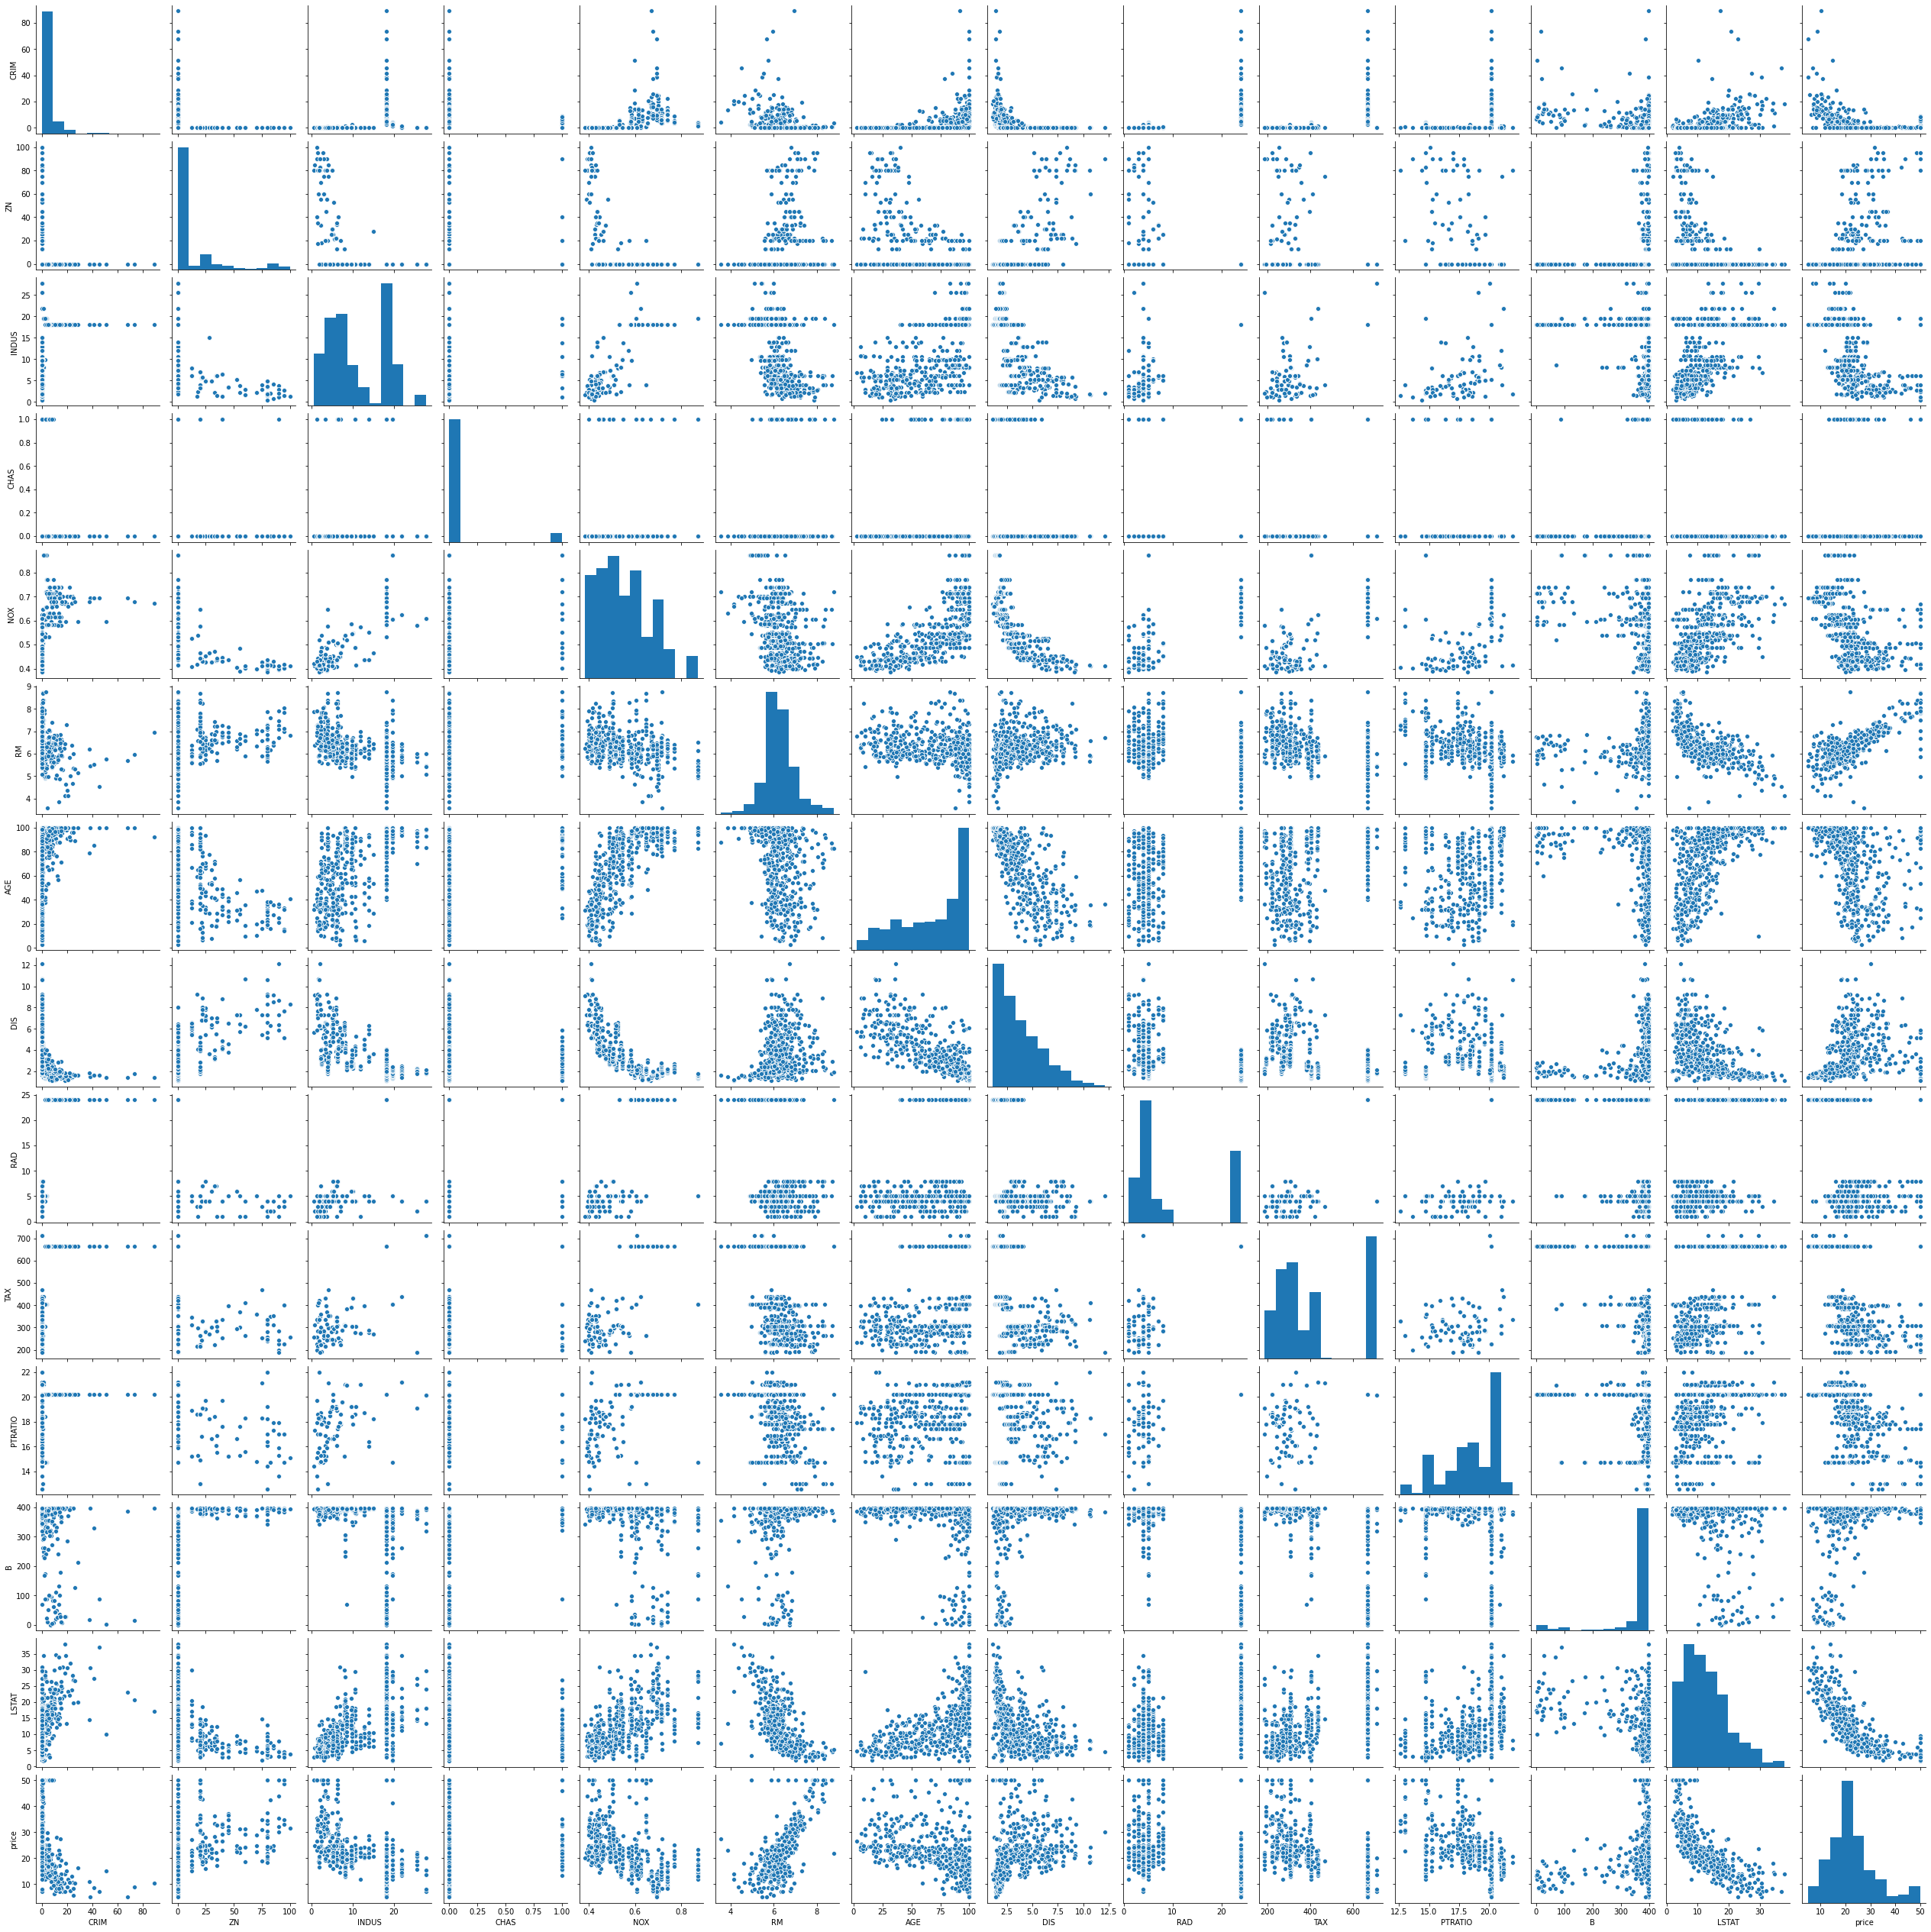

In [9]:
sns.pairplot(df)

In [10]:
df[df.columns[0]]

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: CRIM, Length: 506, dtype: float64

C:\Users\ghild\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


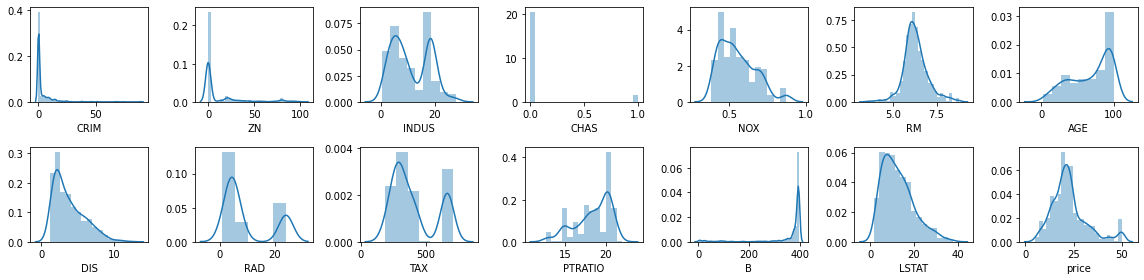

In [11]:
k=0
fig,ax=plt.subplots(2,7,figsize=(16,4))
for i in range(2):
    for j in range(7):
        
        sns.distplot(df[df.columns[k]],ax=ax[i][j])
        k=k+1
plt.tight_layout()

In [12]:
cormat=df.corr()
cormat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


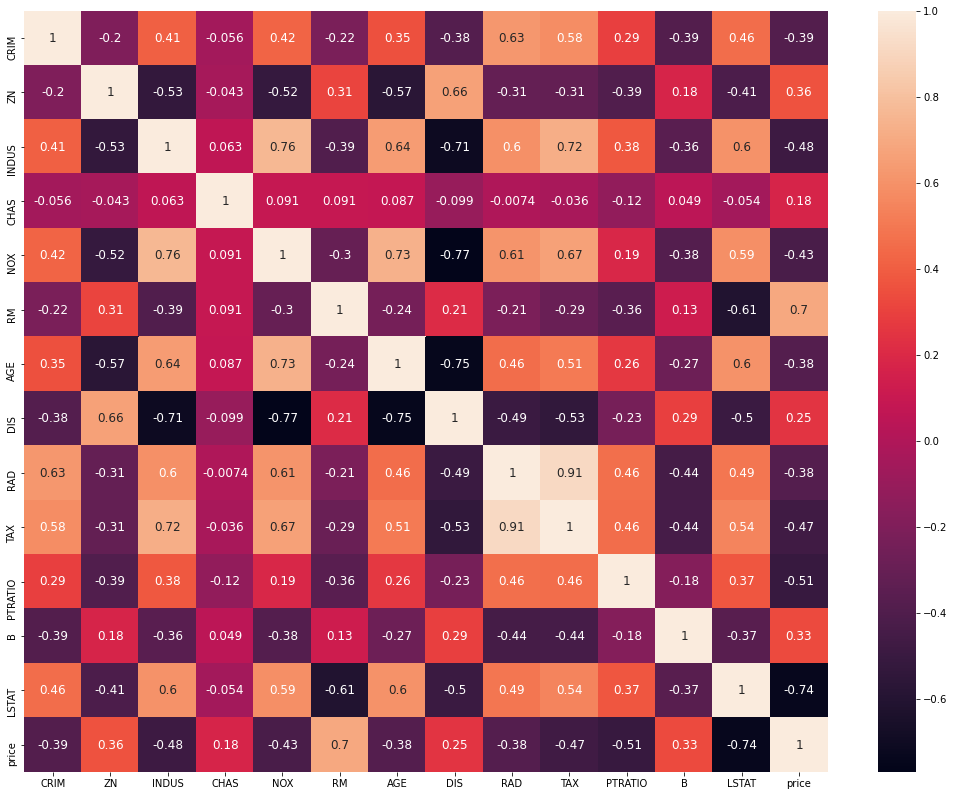

In [13]:
plt.figure(figsize=(18,14))
sns.heatmap(cormat,annot=True,annot_kws={'size':12})

In [14]:
def getcorr(data,threshold):
    feat=[]
    values=[]
    for i,index in enumerate(data.index):
        if abs(data[index])>threshold:
            feat.append(index)
            values.append(data[index])
    
    d1=pd.DataFrame(data=values,index=feat,columns=['corr value'])
    return d1
            
    

In [15]:
d1=getcorr(cormat['price'],0.5)

In [16]:
d1.index.values

array(['RM', 'PTRATIO', 'LSTAT', 'price'], dtype=object)

In [17]:
df1=pd.DataFrame(data=df,columns=d1.index.values)

# PAIRPLOT WITH DATA

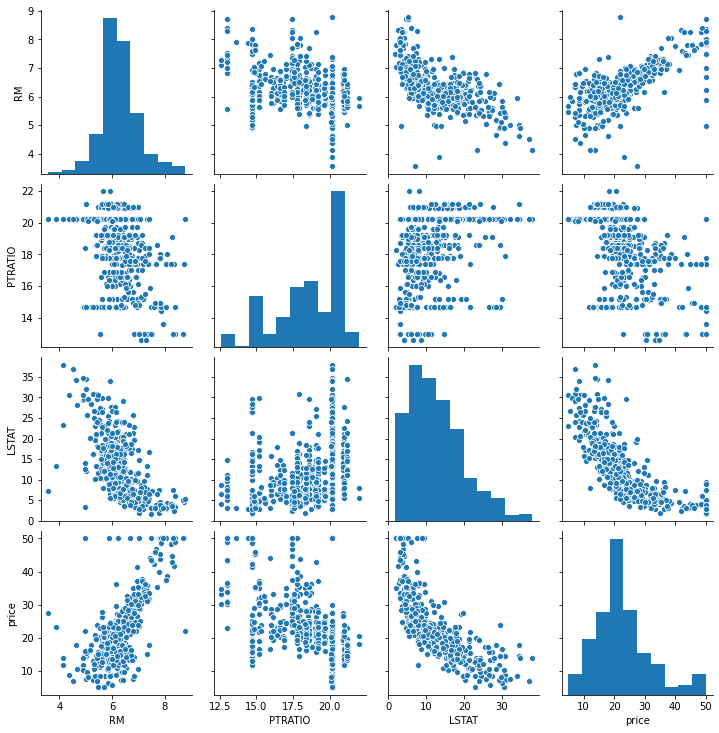

In [18]:
sns.pairplot(df1)

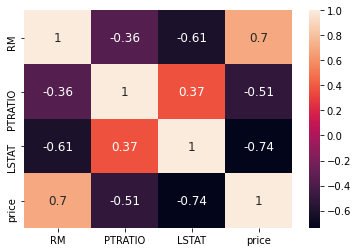

In [19]:
sns.heatmap(df1.corr(),annot=True,annot_kws={'size':12})

# SHUFFLE AND SPLIT THE DATA


In [20]:
x=df1.drop('price',axis=1)
y=df1['price']

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [22]:
x_train.shape,x_test.shape

((404, 3), (102, 3))

In [23]:
def lm(x_train,x_test,y_train,y_test):
    clf=LinearRegression()
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    r2=r2_score(y_test,pred)
    mse=mean_squared_error(y_test,pred)
    mae=mean_absolute_error(y_test,pred)
    print('r2:',r2)
    print('mse:',mse)
    print('mae:',mae)

In [24]:
lm(x_train,x_test,y_train,y_test)

r2: 0.48816420156925067
mse: 41.67799012221683
mae: 4.404434993909257


In [25]:
r2=[]
mse=[]
mae=[]
feat_name=[]

def result(data):
    x=data.drop('price',axis=1)
    y=data['price']
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
    
    clf=LinearRegression()
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    r2.append(r2_score(y_test,pred))
    mse.append(mean_squared_error(y_test,pred))
    mae.append(mean_absolute_error(y_test,pred))
    feat.name(x_train.columns)
    
    results=pd.DataFrame(data=[feat_name,r2,mse,mae],index=['feat_name','r2','mse','mae'])
    
    return results
    

# REGPLOT

In [26]:
df1

,RM,PTRATIO,LSTAT,price
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2
...,...,...,...,...
501,6.593,21.0,9.67,22.4
502,6.120,21.0,9.08,20.6
503,6.976,21.0,5.64,23.9
504,6.794,21.0,6.48,22.0


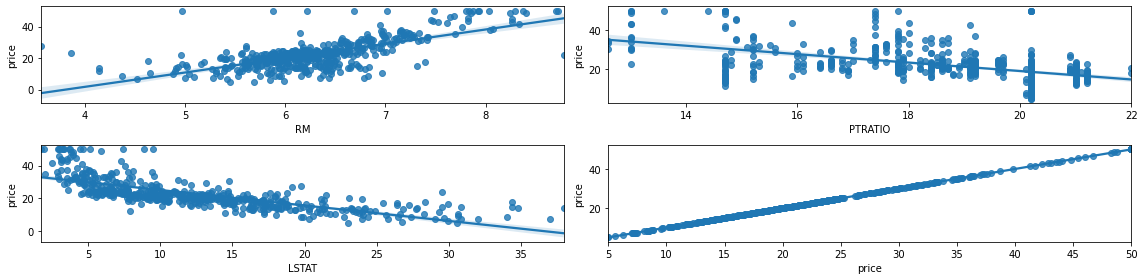

In [27]:
k=0
fig,ax=plt.subplots(2,2,figsize=(16,4))
for i in range(2):
    for j in range(2):
        sns.regplot(x=df1[df1.columns[k]],y=df1['price'],ax=ax[i][j])
        k=k+1
        plt.tight_layout()

# SELECTING FEAT CORR>60

In [28]:
d2=getcorr(cormat['price'],0.6)


In [29]:
d2

,corr value
RM,0.695360
LSTAT,-0.737663
price,1.000000


In [30]:
df3=df[d2.index]

In [31]:
df3

,RM,LSTAT,price
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2
...,...,...,...
501,6.593,9.67,22.4
502,6.120,9.08,20.6
503,6.976,5.64,23.9
504,6.794,6.48,22.0


In [ ]:
# r2=[]
mse=[]
mae=[]
feat_name=[]

def result(data):
    x=data.drop('price',axis=1)
    y=data['price']
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
    clf=LinearRegression(normalize=True)
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    r2.append(r2_score(y_test,pred))
    mse.append(mean_squared_error(y_test,pred))
    mae.append(mean_absolute_error(y_test,pred))
    feat_name.append(x_train.columns)
    
    resul=pd.DataFrame(data=[feat_name,r2,mse,mae],index=['feat_name','r2','mse','mae'])
    
    return resul
    

In [33]:
d1=getcorr(cormat['price'],0.1)
df1=df[d1.index]

In [34]:
result(df1).T

,feat_name,r2,mse,mae
0,"Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', '...",0.589222,33.449,3.84291


# RandomForestRegressor

In [37]:
r2=[]
mse=[]
mae=[]
feat_name=[]

def result(data):
    x=data.drop('price',axis=1)
    y=data['price']
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
    clf=RandomForestRegressor()
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    r2.append(r2_score(y_test,pred))
    mse.append(mean_squared_error(y_test,pred))
    mae.append(mean_absolute_error(y_test,pred))
    feat_name.append(x_train.columns)
    
    resul=pd.DataFrame(data=[feat_name,r2,mse,mae],index=['feat_name','r2','mse','mae'])
    
    return resul
    

In [39]:
result(df1).T

,feat_name,r2,mse,mae
0,"Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', '...",0.776134,18.229,2.61177


In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [48]:
r2=[]
mse=[]
mae=[]
feat_name=[]

def result(data):
    x=data.drop('price',axis=1)
    y=data['price']
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
    clf=DecisionTreeRegressor()
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    r2.append(r2_score(y_test,pred))
    mse.append(mean_squared_error(y_test,pred))
    mae.append(mean_absolute_error(y_test,pred))
    feat_name.append(x_train.columns)
    
    resul=pd.DataFrame(data=[feat_name,r2,mse,mae],index=['feat_name','r2','mse','mae'])
    
    return resul
    

In [49]:
result(df1).T

,feat_name,r2,mse,mae
0,"Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', '...",0.591098,33.2963,3.51569


# GradientBoostingRegressor

In [50]:
r2=[]
mse=[]
mae=[]
feat_name=[]

def result(data):
    x=data.drop('price',axis=1)
    y=data['price']
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
    clf=GradientBoostingRegressor()
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    r2.append(r2_score(y_test,pred))
    mse.append(mean_squared_error(y_test,pred))
    mae.append(mean_absolute_error(y_test,pred))
    feat_name.append(x_train.columns)
    
    resul=pd.DataFrame(data=[feat_name,r2,mse,mae],index=['feat_name','r2','mse','mae'])
    
    return resul
    

In [52]:
result(df1).T

,feat_name,r2,mse,mae
0,"Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', '...",0.782026,17.7493,2.67573
1,"Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', '...",0.782494,17.7112,2.66364
